<a href="https://colab.research.google.com/github/vortexash/Tensorflow-Developer/blob/main/03_introduction_to_computer_vision_with_tensorflow_video.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to Convolutional Neural Networks and Computer Vision with Tensorflow


Computer vision is the practice of writing algorithms which can discover patterns in visual data. Such as the camera of a self-driving car recognizing the car in front.

## Get the data
The images we're working with are from the Food101 dataset
(101 different classese of food):https://www.kaggle.com/dansbecker/food-101

However we've modified it to only use two classes (pizza and steak) using the image data modification notebook: https://github.com/vortexash/tensorflow-deep-learning/blob/main/extras/image_data_modification.ipynb

**Note:** we start with a smaller dataset so we can experiment quickly and figure what works (or better yet what doesn't work) before scaling up


In [1]:
import zipfile

!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip

# Unzip the downloaded file 
zip_ref = zipfile.ZipFile("pizza_steak.zip")
zip_ref.extractall()
zip_ref.close()

--2021-09-19 03:10:50--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 209.85.145.128, 172.217.219.128, 209.85.147.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|209.85.145.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109579078 (105M) [application/zip]
Saving to: ‘pizza_steak.zip’

pizza_steak.zip     100%[===================>] 104.50M   201MB/s    in 0.5s    

2021-09-19 03:10:50 (201 MB/s) - ‘pizza_steak.zip’ saved [109579078/109579078]



## Inspect the data (become one with it)

A very crucial set at the begining of any machine learning project is becoming one with the data

And for a computer vision project... this usually means visualizing many samples of our data

In [2]:
!ls pizza_steak

test  train


In [3]:
 !ls pizza_steak/train/steak

1000205.jpg  1647351.jpg  2238681.jpg  2824680.jpg  3375959.jpg  417368.jpg
100135.jpg   1650002.jpg  2238802.jpg  2825100.jpg  3381560.jpg  4176.jpg
101312.jpg   165639.jpg   2254705.jpg  2826987.jpg  3382936.jpg  42125.jpg
1021458.jpg  1658186.jpg  225990.jpg   2832499.jpg  3386119.jpg  421476.jpg
1032846.jpg  1658443.jpg  2260231.jpg  2832960.jpg  3388717.jpg  421561.jpg
10380.jpg    165964.jpg   2268692.jpg  285045.jpg   3389138.jpg  438871.jpg
1049459.jpg  167069.jpg   2271133.jpg  285147.jpg   3393547.jpg  43924.jpg
1053665.jpg  1675632.jpg  227576.jpg   2855315.jpg  3393688.jpg  440188.jpg
1068516.jpg  1678108.jpg  2283057.jpg  2856066.jpg  3396589.jpg  442757.jpg
1068975.jpg  168006.jpg   2286639.jpg  2859933.jpg  339891.jpg	 443210.jpg
1081258.jpg  1682496.jpg  2287136.jpg  286219.jpg   3417789.jpg  444064.jpg
1090122.jpg  1684438.jpg  2291292.jpg  2862562.jpg  3425047.jpg  444709.jpg
1093966.jpg  168775.jpg   229323.jpg   2865730.jpg  3434983.jpg  447557.jpg
1098844.jpg  1697

In [4]:
import os

# Walk through pizza_steak directory and list number of files
for dirpath,dirnames,filenames in os.walk("pizza_steak"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}''")

There are 2 directories and 1 images in 'pizza_steak''
There are 2 directories and 1 images in 'pizza_steak/train''
There are 0 directories and 750 images in 'pizza_steak/train/pizza''
There are 0 directories and 750 images in 'pizza_steak/train/steak''
There are 2 directories and 1 images in 'pizza_steak/test''
There are 0 directories and 250 images in 'pizza_steak/test/pizza''
There are 0 directories and 250 images in 'pizza_steak/test/steak''


In [5]:
# The extra file in our pizza_steak directory is ".DS_Store"
!ls -la pizza_steak

total 24
drwxr-xr-x 4 root root 4096 Sep 19 03:10 .
drwxr-xr-x 1 root root 4096 Sep 19 03:10 ..
-rw-r--r-- 1 root root 6148 Sep 19 03:10 .DS_Store
drwxr-xr-x 4 root root 4096 Sep 19 03:10 test
drwxr-xr-x 4 root root 4096 Sep 19 03:10 train


In [6]:
# Another way to find out how many images in a file

num_steak_images_train = len(os.listdir("pizza_steak/train/steak"))
num_steak_images_train


750

To visualize our images, first let's get the class name programmaticaly

In [7]:
# Get the class names programmatically
import pathlib
import numpy as np
data_dir = pathlib.Path("pizza_steak/train")
class_names = np.array(sorted([item.name for item in data_dir.glob('*')])) # Create a list of class_names from the subdirectories
class_names = class_names[1:] # remove .DS.store
print(class_names)

['pizza' 'steak']


In [8]:
 # Let's visualize our images
 import matplotlib.pyplot as plt
 import matplotlib.image as mpimg
 import random

 def view_random_image(target_dir, target_class):
   # Set the target directory (we'll view images from here)

   target_folder = target_dir + target_class

   # Get a random image path
   random_image = random.sample(os.listdir(target_folder),1)
   print(random_image)

   # Read in the image and plot it using matplotlib
   img = mpimg.imread(target_folder + "/" + random_image[0])
   plt.imshow(img)
   plt.title(target_class)
   plt.axis("off");

   print(f"Image shape: {img.shape}") # show the shape of the image

   return img

['823104.jpg']
Image shape: (306, 512, 3)


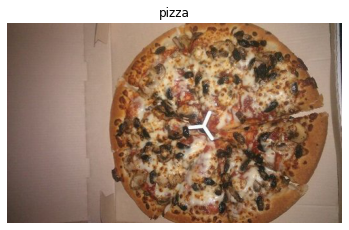

In [9]:
# View a random image from the training dataset
img = view_random_image(target_dir="pizza_steak/train/", target_class="pizza")

In [10]:
img.dtype

dtype('uint8')

In [11]:
import tensorflow as tf
tf.constant(img)

<tf.Tensor: shape=(306, 512, 3), dtype=uint8, numpy=
array([[[90, 72, 62],
        [89, 71, 59],
        [88, 70, 58],
        ...,
        [20, 26, 24],
        [20, 29, 26],
        [17, 26, 23]],

       [[89, 71, 61],
        [89, 71, 59],
        [88, 70, 58],
        ...,
        [23, 29, 27],
        [22, 31, 28],
        [18, 27, 24]],

       [[89, 69, 60],
        [89, 69, 58],
        [89, 69, 58],
        ...,
        [22, 28, 26],
        [21, 30, 27],
        [16, 25, 22]],

       ...,

       [[68, 53, 46],
        [67, 52, 45],
        [66, 51, 44],
        ...,
        [82, 66, 50],
        [85, 69, 53],
        [84, 68, 52]],

       [[68, 49, 43],
        [68, 49, 43],
        [65, 50, 43],
        ...,
        [79, 66, 50],
        [79, 70, 55],
        [79, 72, 56]],

       [[68, 49, 43],
        [68, 49, 43],
        [65, 50, 43],
        ...,
        [79, 66, 50],
        [79, 70, 55],
        [79, 72, 56]]], dtype=uint8)>

In [12]:
  # View the image shape
  img.shape # returns width, height , colour channels

(306, 512, 3)

**Note:** A we've discussed before, many machine learning ,models, including neural networks prefer the values they work with to be between 0 and 1. Knowing this, one of the most common preprocessing steps for working with images is to **scale** (aslo referred to as **normalize**) their pixel values by dividing the images arrays by 255.(since 255 is the maximum pixel value).

In [13]:
# Get all the pixel values between 0 & 1
img/225.

array([[[0.4       , 0.32      , 0.27555556],
        [0.39555556, 0.31555556, 0.26222222],
        [0.39111111, 0.31111111, 0.25777778],
        ...,
        [0.08888889, 0.11555556, 0.10666667],
        [0.08888889, 0.12888889, 0.11555556],
        [0.07555556, 0.11555556, 0.10222222]],

       [[0.39555556, 0.31555556, 0.27111111],
        [0.39555556, 0.31555556, 0.26222222],
        [0.39111111, 0.31111111, 0.25777778],
        ...,
        [0.10222222, 0.12888889, 0.12      ],
        [0.09777778, 0.13777778, 0.12444444],
        [0.08      , 0.12      , 0.10666667]],

       [[0.39555556, 0.30666667, 0.26666667],
        [0.39555556, 0.30666667, 0.25777778],
        [0.39555556, 0.30666667, 0.25777778],
        ...,
        [0.09777778, 0.12444444, 0.11555556],
        [0.09333333, 0.13333333, 0.12      ],
        [0.07111111, 0.11111111, 0.09777778]],

       ...,

       [[0.30222222, 0.23555556, 0.20444444],
        [0.29777778, 0.23111111, 0.2       ],
        [0.29333333, 0

## An end-to-end example

Let's build a convolutional neural network to find patterns in our images, more specifically we need a way to:

* Load our images
* Preprocess our images
* Build a CNN to find patterns in our images
* Compile our CNn 
* Fit the CNN to our training data


In [14]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Set the seed
tf.random.set_seed(42)

# Preprocess data (get all of the pixel value between 0 & 1 also called scaling/ normalization)

train_datagen = ImageDataGenerator(rescale = 1./255)
valid_datagen = ImageDataGenerator(rescale=1./255)

# Setup paths to our data directories
train_dir = "pizza_steak/train"
test_dir = "pizza_steak/test"

# Import data from directories and turn it into batches
train_data = train_datagen.flow_from_directory(directory=train_dir,
                                               batch_size=32,
                                               target_size=(224,224),
                                               class_mode="binary",
                                               seed=42) 
valid_data = valid_datagen.flow_from_directory(directory=test_dir,
                                               batch_size=32,
                                               target_size=(224,224),
                                               class_mode="binary",
                                               seed=42)

# Build a CNN model (same as the Tiny VGG on the CNN explainer website)

model_1 = tf.keras.models.Sequential([
     tf.keras.layers.Conv2D(filters=10,
                            kernel_size= 3,
                            activation="relu",
                            input_shape=(224, 224, 3)),
     tf.keras.layers.Conv2D(10, 3,activation="relu"),
     tf.keras.layers.MaxPool2D(pool_size=2,padding="valid"),
     tf.keras.layers.Conv2D(10,3, activation="relu"),
     tf.keras.layers.Conv2D(10,3, activation="relu"),
     tf.keras.layers.MaxPool2D(2),
     tf.keras.layers.Flatten(),
     tf.keras.layers.Dense(1, activation="sigmoid")                   
])

# Compile our CNN model

model_1.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# Fit the model
history_1 = model_1.fit(train_data, 
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.
Epoch 1/5
47/47 [==============================] - 44s 250ms/step - loss: 0.5775 - accuracy: 0.6913 - val_loss: 0.4456 - val_accuracy: 0.7740
Epoch 2/5
47/47 [==============================] - 11s 225ms/step - loss: 0.4359 - accuracy: 0.8127 - val_loss: 0.3488 - val_accuracy: 0.8740
Epoch 3/5
47/47 [==============================] - 10s 223ms/step - loss: 0.3973 - accuracy: 0.8333 - val_loss: 0.3240 - val_accuracy: 0.8780
Epoch 4/5
47/47 [==============================] - 11s 226ms/step - loss: 0.3926 - accuracy: 0.8340 - val_loss: 0.3438 - val_accuracy: 0.8540
Epoch 5/5
47/47 [==============================] - 11s 227ms/step - loss: 0.3348 - accuracy: 0.8587 - val_loss: 0.2910 - val_accuracy: 0.8840


**Note:** If the above cell is taking longer than ~10 seconds per epoch, make sure yor're using GPU by goin to runtime change -> Change Runtime Type -> Hardware Accelator -> GPU
(you may have to rerun some cells above)

In [15]:
# Get model summary
model_1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 222, 222, 10)      280       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 220, 220, 10)      910       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 110, 110, 10)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 108, 108, 10)      910       
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 106, 106, 10)      910       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 53, 53, 10)        0         
_________________________________________________________________
flatten (Flatten)            (None, 28090)             0

## Using the same model as before

Let's replicate the model we've built in a previous section to see if it works with our image data.

The model we'vebuilding is from the [TensorFlow playground](https://playground.tensorflow.org/#activation=tanh&batchSize=10&dataset=circle&regDataset=reg-plane&learningRate=0.03&regularizationRate=0&noise=0&networkShape=4,2&seed=0.20343&showTestData=false&discretize=false&percTrainData=50&x=true&y=true&xTimesY=false&xSquared=false&ySquared=false&cosX=false&sinX=false&cosY=false&sinY=false&collectStats=false&problem=classification&initZero=false&hideText=false):


In [16]:
# Set random seed
tf.random.set_seed(42)

# Create a model to replicate the TensorFlow Playground model

model_2 = tf.keras.Sequential([
     tf.keras.layers.Flatten(input_shape=(224,224,3)),
     tf.keras.layers.Dense(4, activation="relu"),
     tf.keras.layers.Dense(4, activation="relu"),
     tf.keras.layers.Dense(1, activation="sigmoid")
])

# Compile the model

model_2.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# Fit the model
history_2 = model_2.fit(train_data, epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))

Epoch 1/5
47/47 [==============================] - 10s 205ms/step - loss: 1.2784 - accuracy: 0.4980 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 2/5
47/47 [==============================] - 9s 199ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 3/5
47/47 [==============================] - 9s 198ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 4/5
47/47 [==============================] - 9s 198ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 5/5
47/47 [==============================] - 9s 199ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000


In [17]:
# Get a summary of model_2
model_2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 150528)            0         
_________________________________________________________________
dense_1 (Dense)              (None, 4)                 602116    
_________________________________________________________________
dense_2 (Dense)              (None, 4)                 20        
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 5         
Total params: 602,141
Trainable params: 602,141
Non-trainable params: 0
_________________________________________________________________


Despite having 20x more parameters than our CNN(model_1), model_2 performs terribly..let's try 

In [18]:
# Set the random seed
tf.random.set_seed(42)

# Create the model (same as above but let's step it up a notch)

model_3 = tf.keras.Sequential([
      tf.keras.layers.Flatten(input_shape=(224,224,3)),
      tf.keras.layers.Dense(100, activation="relu"),
      tf.keras.layers.Dense(100, activation="relu"),
      tf.keras.layers.Dense(100,activation="relu"),
      tf.keras.layers.Dense(1, activation="sigmoid")
])

# Compile the model

model_3.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# Fit the model

history_3 = model_3.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps =len(valid_data)
                        )
                

Epoch 1/5
47/47 [==============================] - 10s 210ms/step - loss: 3.5933 - accuracy: 0.6193 - val_loss: 0.6173 - val_accuracy: 0.6980
Epoch 2/5
47/47 [==============================] - 10s 207ms/step - loss: 0.7779 - accuracy: 0.6960 - val_loss: 0.7511 - val_accuracy: 0.7100
Epoch 3/5
47/47 [==============================] - 10s 205ms/step - loss: 1.0128 - accuracy: 0.6800 - val_loss: 0.4532 - val_accuracy: 0.7920
Epoch 4/5
47/47 [==============================] - 10s 208ms/step - loss: 0.5534 - accuracy: 0.7553 - val_loss: 0.5704 - val_accuracy: 0.7100
Epoch 5/5
47/47 [==============================] - 10s 207ms/step - loss: 0.5284 - accuracy: 0.7627 - val_loss: 0.5265 - val_accuracy: 0.7600


In [19]:
# Get a summmary of model_3
model_3.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_2 (Flatten)          (None, 150528)            0         
_________________________________________________________________
dense_4 (Dense)              (None, 100)               15052900  
_________________________________________________________________
dense_5 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_6 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 101       
Total params: 15,073,201
Trainable params: 15,073,201
Non-trainable params: 0
_________________________________________________________________


**Note:** We can think of trainable parametetrs as **patterns a model can learn from data**. Intuitively, we might think more is better. And in lots of cases, it is. But in this case, the difference here is the two different styles of model we're using. Where a series of dense layers has a number of differernt learnable parameters connected to each other and hence a higher number of possible learnable patterns, **a convolutional neural network seeks to sort out and learn the most important patterns in an image**. So even though these are less learnable parameters in our convolutional neural network, these are often more helpful in de-chipering between different **features** in an image.

In [20]:
model_1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 222, 222, 10)      280       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 220, 220, 10)      910       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 110, 110, 10)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 108, 108, 10)      910       
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 106, 106, 10)      910       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 53, 53, 10)        0         
_________________________________________________________________
flatten (Flatten)            (None, 28090)             0

## Binary Classification: Let's break it down

1. Become one with the data (visualize, visualize, visualize)
2. Preprocess the data (prepared it for our model, the main step here was scaling/normalizing & turning our data into batches)
3. Created a model(start with a baseline)
4. Fit the model
5. Evaluate the model
6. Adjust differernt parameters and improve the model(try to beat our baseline)
7. Repeat until satisfied(experiment, experiment,experiment)

### 1. Become one with the data

['388776.jpg']
Image shape: (512, 384, 3)
['1836888.jpg']
Image shape: (512, 512, 3)


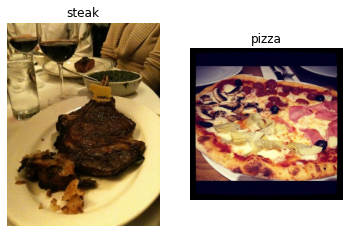

In [21]:
# Visualize data
plt.figure()
plt.subplot(1,2,1)
steak_img = view_random_image("pizza_steak/train/", "steak")
plt.subplot(1,2,2)
steak_img = view_random_image("pizza_steak/train/", "pizza")

### 2. Preprocess the data (prepare it fo a model)

In [22]:
# Define directory dataset paths
train_dir = "pizza_steak/train/"
test_dir = "pizza_steak/test/"

Our next step is to turn our data into **batches**.

A batch is a small subset of data. Rather than looking ar all ~10000 images at one time , amodel might only look at 32 at a time.

It does this for a couple of reasons:
1. 10,000 images (or more) might not fit into the memory of your processor(CPU).
2. Trying to learn the patterns in 10,00 images in one hit could result in the model not being able to learn  very well.


Why 32?
Because is good for your health...

In [23]:
# !nvidia-smi

In [24]:
# Create train and test data generators and rescale the data

from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)

In [25]:
# Load in our image data from directories and turn them into batches
train_data = train_datagen.flow_from_directory(directory=train_dir, # Target directory of images
                                               target_size =(224,224), # Target size of input image(height, width)
                                               class_mode="binary", # Type of data you're working with
                                               batch_size=32) # Size of minibatches to load data into
test_data = test_datagen.flow_from_directory(directory=test_dir,
                                             target_size=(224,224),
                                             class_mode="binary",
                                             batch_size=32)

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [26]:
# Get a sample of a train data batches
images,labels = train_data.next() # get the "next" batches of images/ labels in train_data
len(images), len(labels)

(32, 32)

In [27]:
# how many batches are there?
len(train_data)

47

In [28]:
1500/32

46.875

In [29]:
# Get the first two images
images[:2], images[0].shape

(array([[[[0.47058827, 0.40784317, 0.34509805],
          [0.4784314 , 0.427451  , 0.3647059 ],
          [0.48627454, 0.43529415, 0.37254903],
          ...,
          [0.8313726 , 0.70980394, 0.48627454],
          [0.8431373 , 0.73333335, 0.5372549 ],
          [0.87843144, 0.7725491 , 0.5882353 ]],
 
         [[0.50980395, 0.427451  , 0.36078432],
          [0.5058824 , 0.42352945, 0.35686275],
          [0.5137255 , 0.4431373 , 0.3647059 ],
          ...,
          [0.82745105, 0.7058824 , 0.48235297],
          [0.82745105, 0.70980394, 0.5058824 ],
          [0.8431373 , 0.73333335, 0.5372549 ]],
 
         [[0.5254902 , 0.427451  , 0.34901962],
          [0.5372549 , 0.43921572, 0.36078432],
          [0.5372549 , 0.45098042, 0.36078432],
          ...,
          [0.82745105, 0.7019608 , 0.4784314 ],
          [0.82745105, 0.7058824 , 0.49411768],
          [0.8352942 , 0.7176471 , 0.5137255 ]],
 
         ...,
 
         [[0.77647066, 0.5647059 , 0.2901961 ],
          [0.78039

In [30]:
images[7].shape

(224, 224, 3)

In [31]:
# View the first batch of labels
labels

array([1., 1., 0., 1., 0., 0., 0., 1., 0., 1., 0., 0., 1., 0., 0., 0., 1.,
       1., 0., 1., 0., 1., 1., 1., 0., 0., 0., 0., 0., 1., 0., 1.],
      dtype=float32)

### 3. Create a CNN model (start with a baseline)

A baseline is a relatively simple model or existing result that we setup when begining a machine learning experiment and then as you keep experimenting , we can try to  beat the baseline.

**Note:** In deep learning , there is almost an infinite amount of architectures we could create. So one of the best ways to get started is to start with something simple and see if it works on your data amd then introduce complexity as required ( e.g look at which current model is performing best in the field for our problem)

In [32]:
# Make the creating of our model a little easier
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Activation
from tensorflow.keras import Sequential


In [33]:
# Create the model (this will be our baseline, a layer convolutional neural network)
model_4 = Sequential([
   Conv2D(filters=10, # filter is the number od sliding windows going across an input( higher=more complex model)).
          kernel_size=3, # the size of  the sliding window going across an input.
          strides=1, # the size of the step the sliding window takes across an input
          padding="valid", # if "same", output shape is same as input shape, if "valid", output shape  get compressed
          activation="relu",
          input_shape=(224,224,3)),
  Conv2D(10, 3, activation="relu"),
  Conv2D(10,3 , activation="relu"),
  Flatten(),
  Dense(1, activation="sigmoid") # output layer (working with binary classification so only 1 output neuron)
])

In [34]:
 # Compiling our model
 model_4.compile(loss="binary_crossentropy",
                 optimizer=Adam(),
                 metrics=["accuracy"])

In [35]:
# Get a summary of outr model
model_4.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 222, 222, 10)      280       
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 220, 220, 10)      910       
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 218, 218, 10)      910       
_________________________________________________________________
flatten_3 (Flatten)          (None, 475240)            0         
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 475241    
Total params: 477,341
Trainable params: 477,341
Non-trainable params: 0
_________________________________________________________________


### 4. Fit the model

In [36]:
# Check the lengths of training and test data generators
len(train_data), len(test_data)

(47, 16)

In [37]:
# Fit the model
history_4 = model_3.fit(train_data, # this is a combination of labels and sample data
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps =len(valid_data),
                        )             

Epoch 1/5
47/47 [==============================] - 10s 213ms/step - loss: 0.5167 - accuracy: 0.7753 - val_loss: 0.6090 - val_accuracy: 0.7220
Epoch 2/5
47/47 [==============================] - 10s 205ms/step - loss: 0.4916 - accuracy: 0.7853 - val_loss: 0.6687 - val_accuracy: 0.6760
Epoch 3/5
47/47 [==============================] - 10s 204ms/step - loss: 0.4767 - accuracy: 0.7793 - val_loss: 0.6408 - val_accuracy: 0.6840
Epoch 4/5
47/47 [==============================] - 9s 201ms/step - loss: 0.4348 - accuracy: 0.8020 - val_loss: 0.6324 - val_accuracy: 0.6960
Epoch 5/5
47/47 [==============================] - 9s 200ms/step - loss: 0.3968 - accuracy: 0.8287 - val_loss: 0.4659 - val_accuracy: 0.7760


## 5. Evaluating our model

it looks like our model is learning something,let's evaluate it

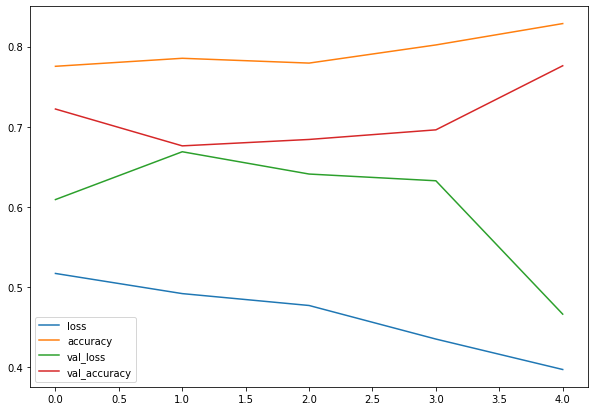

In [38]:
import pandas as pd
pd.DataFrame(history_4.history).plot(figsize=(10,7))

In [39]:
# Plot the validation and training curves seperately
def plot_loss_curves(history):
  """
  Returns seperate loss curves for training and validation metrics.
  """
  loss = history.history["loss"]
  val_loss = history.history["val_loss"]

  accuracy = history.history["accuracy"]
  val_accuracy = history.history["val_accuracy"]

  epochs = range(len(history.history["loss"])) # how many epochs did we run for?

  # Plot loss
  plt.plot(epochs, loss , label="training_loss")
  plt.plot(epochs, val_loss, label ="val_loss")
  plt.title("loss")
  plt.xlabel("epochs")
  plt.legend()

  # Plot accuracy
  plt.figure() # if you want ne plot then we use this 
  plt.plot(epochs, accuracy , label="training_accuracy")
  plt.plot(epochs, val_accuracy, label ="val_accuracy")
  plt.title("accuracy")
  plt.xlabel("epochs")
  plt.legend()

**Note:** When a model's **validation loss starts to increase**, it's likely the model is **overfitting** the training dataset. This means, it's learning the patterns in the training dataset *too well* and thus the model's ability to generalize to unseen data will diminished.

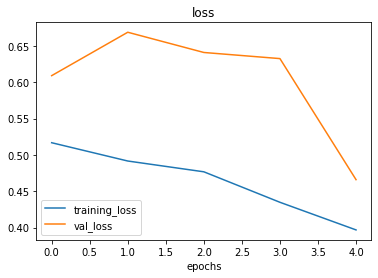

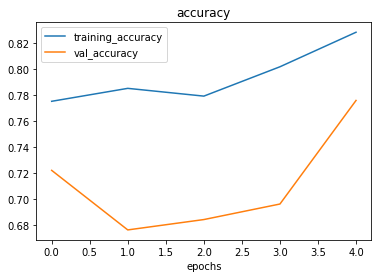

In [40]:
# Check out the loss and accuracy of model_4
plot_loss_curves(history_4) 

#### 6. Adjust the model parameters

Fitting a machine learning models comes in 3 steps:

0. Create a baseline
1. Beat the baseline by overfitting a larger model
2. Reduce overfitting

Ways to induce overfitting:
* Increase the number of conv layers.
* Increase the number of conv filters.
* Add another dense layer to output of our flattened layer

Reduce overfitting:
* Add data augmentation
* Add regularization layers (such as MaxPool2D)
* Add more data..


**Note:**  Reducting overfitting is also know as **Regularization**.

In [41]:
# Create the model (this is going to be our base line)
model_5 = Sequential([
     Conv2D(10,3, activation="relu",input_shape=(224,224,3)),
     MaxPool2D(pool_size=2),
     Conv2D(10,3, activation="relu"),
     MaxPool2D(),
     Conv2D(10,3, activation="relu"),
     MaxPool2D(),
     Flatten(),
     Dense(1, activation="sigmoid")                 
])

# Compile the model
model_5.compile(loss="binary_crossentropy",
                optimizer=Adam(),
                metrics=["accuracy"])

# fit the model
history_5 = model_5.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps =len(valid_data))

Epoch 1/5
47/47 [==============================] - 11s 217ms/step - loss: 0.5980 - accuracy: 0.6733 - val_loss: 0.4736 - val_accuracy: 0.7840
Epoch 2/5
47/47 [==============================] - 10s 212ms/step - loss: 0.4723 - accuracy: 0.7773 - val_loss: 0.4120 - val_accuracy: 0.8160
Epoch 3/5
47/47 [==============================] - 10s 211ms/step - loss: 0.4321 - accuracy: 0.8113 - val_loss: 0.3536 - val_accuracy: 0.8620
Epoch 4/5
47/47 [==============================] - 10s 217ms/step - loss: 0.3917 - accuracy: 0.8253 - val_loss: 0.3591 - val_accuracy: 0.8280
Epoch 5/5
47/47 [==============================] - 10s 217ms/step - loss: 0.3938 - accuracy: 0.8307 - val_loss: 0.3874 - val_accuracy: 0.8240


In [42]:
# Get a summary of our model with MaxPooling 
model_5.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 222, 222, 10)      280       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 111, 111, 10)      0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 109, 109, 10)      910       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 54, 54, 10)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 52, 52, 10)        910       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 26, 26, 10)        0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 6760)             

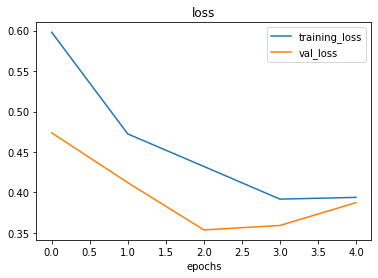

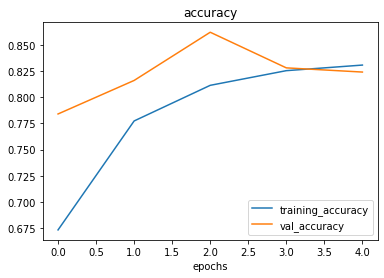

In [43]:
# Check out the loss and accuracy of model_5
plot_loss_curves(history_5) 

**bold text**### Openinig our bag of tricks and finding Data Augmentation

In [44]:
# Create ImageDataGenerator training instance with data augmentation
train_datagen_augmented = ImageDataGenerator(rescale = 1/255.,
                                             rotation_range=0.2, #How much do you want to rotate an image?
                                             shear_range=0.2, # How much do you want to shear an image?
                                             zoom_range=0.2, # Zoom in randomly on an image
                                             width_shift_range=0.2, # move the image around on the x-axis
                                             height_shift_range=0.3,# move your image around on the y-axis
                                             horizontal_flip=True) # do you want to filp and iamge?

# Create ImageDataGenerator without data augmentation
train_datagen = ImageDataGenerator(rescale=1/255.)

# Create ImageDataGenerator without data augmentation for the test dataset
test_datagen = ImageDataGenerator(rescale = 1/255.)


**Question:** What is data augmentation?

Data augmentation is the process of altering our training data, leading it to have more diversity and in turn allowing our models to learn more generalizable (hopefully) patterns. Altering might mean adjusting the rotation of an image, flipping it, cropping it or something similar

Let's write some code to visualize data augmentaion..

In [45]:
# Import data and augment it from training directory
print("Augmented training data")
train_data_augmented  = train_datagen_augmented.flow_from_directory(train_dir,
                                                                    target_size=(224,224),
                                                                    batch_size=32,
                                                                    class_mode="binary",
                                                                    shuffle=False) # for demonstarion purpose only

# Create non-augmented train data batches
print("Non-augmented training data:")
train_data = train_datagen.flow_from_directory(train_dir,
                                               target_size=(224,224),
                                               batch_size=32,
                                               class_mode="binary",
                                               shuffle=False) 

# Create non-augmented test data batches
print("Non-augmented test data")
test_data = test_datagen.flow_from_directory(test_dir,
                                             target_size=(224,224),
                                             batch_size=32,
                                             class_mode="binary")

Augmented training data
Found 1500 images belonging to 2 classes.
Non-augmented training data:
Found 1500 images belonging to 2 classes.
Non-augmented test data
Found 500 images belonging to 2 classes.


**Note:** Data augmentation is usually only performed on the training data. Using `ImageDataGenerator` built-in data augmentation parameters our images are left as they are in the directories but are modified as they're loaded into the model.

Finally .. let's visualize some augmented data!!

In [46]:
# Get sample data batches
images, labels = train_data.next()
augmented_images, augmented_labels = train_data_augmented.next()# note: labels aren't augmented... only data(images)

Showing image number: 5


(-0.5, 223.5, 223.5, -0.5)

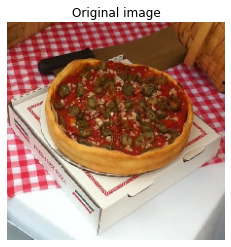

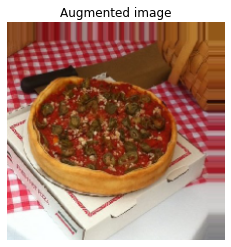

In [47]:
# Sow the original anr a augmented image
import random
random_number = random.randint(0 , 32) # our batch sizes are 32

print(f"Showing image number: {random_number}")
plt.imshow(images[random_number])
plt.title(f"Original image")
plt.axis(False)
plt.figure()
plt.imshow(augmented_images[random_number])
plt.title(f"Augmented image")
plt.axis(False)

Now we've seen what augmented training data looks like, let's build a model ans see how ot learns on augmented data

In [48]:
# Create the model (same as the model_5)
model_6 = Sequential([
     Conv2D(10,3, activation="relu",input_shape=(224,224,3)),
     MaxPool2D(pool_size=2),
     Conv2D(10,3, activation="relu"),
     MaxPool2D(),
     Conv2D(10,3, activation="relu"),
     MaxPool2D(),
     Flatten(),
     Dense(1, activation="sigmoid")                 
])

# Compile the model
model_6.compile(loss="binary_crossentropy",
                optimizer=Adam(),
                metrics=["accuracy"])

# fit the model
history_6 = model_6.fit(train_data_augmented,
                        epochs=5,
                        steps_per_epoch=len(train_data_augmented),
                        validation_data=valid_data,
                        validation_steps =len(valid_data))

Epoch 1/5
47/47 [==============================] - 26s 539ms/step - loss: 0.7208 - accuracy: 0.5493 - val_loss: 0.6962 - val_accuracy: 0.5000
Epoch 2/5
47/47 [==============================] - 25s 524ms/step - loss: 0.6975 - accuracy: 0.4967 - val_loss: 0.6867 - val_accuracy: 0.5100
Epoch 3/5
47/47 [==============================] - 25s 532ms/step - loss: 0.6892 - accuracy: 0.5487 - val_loss: 0.6767 - val_accuracy: 0.6240
Epoch 4/5
47/47 [==============================] - 25s 538ms/step - loss: 0.6865 - accuracy: 0.5807 - val_loss: 0.6537 - val_accuracy: 0.7480
Epoch 5/5
47/47 [==============================] - 26s 544ms/step - loss: 0.6955 - accuracy: 0.5300 - val_loss: 0.6409 - val_accuracy: 0.6960


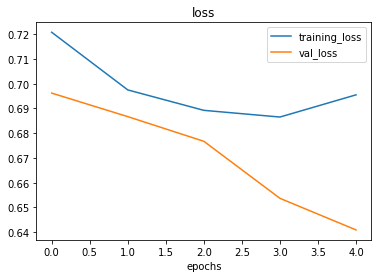

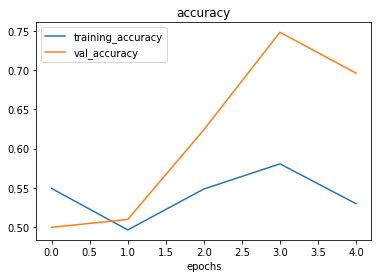

In [49]:
# Check out the loss and accuracy of model_6
plot_loss_curves(history_6) 

Let's shuffle our augmented training data and train another model same as before and see what happens.

In [51]:
# Import data and augment ir and shuffle from training directory
train_data_augmented_shuffled = train_datagen_augmented.flow_from_directory(train_dir,
                                                                    target_size=(224,224),
                                                                    batch_size=32,
                                                                    class_mode="binary",
                                                                    shuffle=True) # shuffle data this time

Found 1500 images belonging to 2 classes.


In [59]:
# Create the model(same as model_5 and model_6)
model_7 = Sequential([
    Conv2D(10,3,activation='relu',input_shape=(224,224,3)),
    MaxPool2D(),
    Conv2D(10,3,activation='relu'),
    MaxPool2D(),
    Conv2D(10,3,activation="relu"),
    Flatten(),
    Dense(1,activation='sigmoid')
])

# Compile the model
model_7.compile(loss="binary_crossentropy",
                optimizer=Adam(),
                metrics=['accuracy'])

# Fit the model
history_7 = model_7.fit(train_data_augmented_shuffled,# We're fitting and shuffled data
                      epochs=5,
                      steps_per_epoch=len(train_data_augmented_shuffled),
                      validation_data=test_data,
                      validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 25s 528ms/step - loss: 0.6475 - accuracy: 0.6160 - val_loss: 0.5359 - val_accuracy: 0.7560
Epoch 2/5
47/47 [==============================] - 25s 523ms/step - loss: 0.5845 - accuracy: 0.6840 - val_loss: 0.4508 - val_accuracy: 0.8040
Epoch 3/5
47/47 [==============================] - 24s 519ms/step - loss: 0.5495 - accuracy: 0.7187 - val_loss: 0.4156 - val_accuracy: 0.8340
Epoch 4/5
47/47 [==============================] - 24s 520ms/step - loss: 0.5188 - accuracy: 0.7433 - val_loss: 0.4371 - val_accuracy: 0.8000
Epoch 5/5
47/47 [==============================] - 25s 522ms/step - loss: 0.5691 - accuracy: 0.7180 - val_loss: 0.4517 - val_accuracy: 0.8060


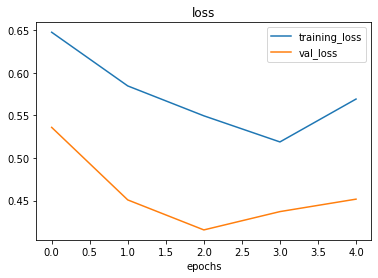

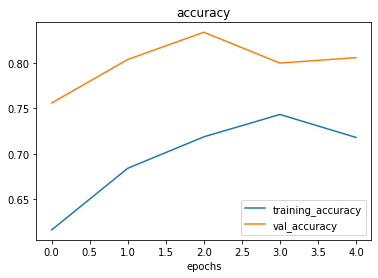

In [60]:
#Plot loss curves for history_7
plot_loss_curves(history_7)

**Note:** When shuffling training data, the model gets exposed to all differrent kinds dof data during training, thus enabling it to learn features across a wide range of images(in our case, pizza & steaks at the smae time instead of just pizza then steak)

### 7. Repeat until satisfied

Since we've already beaten our baseline , there are a few things we could try to continue to improve our model:

*Increase the number of model layers(e.g add more `Conv2D`/ `maxPool2D` layers)
*Increase the number of filters in each convolutional layer(e.g from 10 to 32 or even 64)
* Train fro longer (more epochs)
* Find an ideal learning rate
* Get more data  (give the model more opportunities to learn)
* Use *transfer learning* to leverage what another image model had learn and adjust it for our own use case.

## Making a prediction with our own trained model on our own custom data

In [61]:
# Classes we're working with
print(class_names)

['pizza' 'steak']


--2021-09-19 04:23:37--  https://raw.githubusercontent.com/vortexash/tensorflow-deep-learning/main/images/03-steak.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1978213 (1.9M) [image/jpeg]
Saving to: ‘03-steak.jpeg.2’

03-steak.jpeg.2     100%[===================>]   1.89M  --.-KB/s    in 0.06s   

2021-09-19 04:23:37 (30.9 MB/s) - ‘03-steak.jpeg.2’ saved [1978213/1978213]



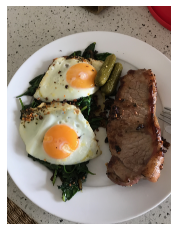

In [64]:
# View our example image
!wget https://raw.githubusercontent.com/vortexash/tensorflow-deep-learning/main/images/03-steak.jpeg
steak = mpimg.imread("03-steak.jpeg")
plt.imshow(steak)
plt.axis(False);

In [65]:
# Check the shape of our image
steak.shape

(4032, 3024, 3)

In [66]:
tf.expand_dims(steak, axis=0)

<tf.Tensor: shape=(1, 4032, 3024, 3), dtype=uint8, numpy=
array([[[[162, 158, 149],
         [163, 159, 150],
         [166, 162, 153],
         ...,
         [136,  17,  23],
         [140,  21,  27],
         [140,  21,  27]],

        [[164, 160, 151],
         [164, 160, 151],
         [164, 160, 151],
         ...,
         [133,  14,  20],
         [134,  15,  21],
         [137,  18,  24]],

        [[166, 162, 153],
         [165, 161, 152],
         [163, 159, 150],
         ...,
         [136,  17,  23],
         [134,  15,  21],
         [136,  17,  23]],

        ...,

        [[154, 132, 109],
         [142, 122,  98],
         [101,  80,  59],
         ...,
         [165, 154, 148],
         [152, 141, 135],
         [140, 129, 123]],

        [[141, 119,  95],
         [139, 117,  93],
         [106,  86,  62],
         ...,
         [158, 147, 141],
         [142, 131, 125],
         [138, 127, 121]],

        [[148, 127, 100],
         [149, 127, 103],
         [114,  

**Note:** When we train a neural network and you want to make a prediction with it on your own custom data, it's important than your custom data(or new data) is preprocessed into the same format as the  data your model was trained on.

In [75]:
# Create a function to import  and image and resize it to be able used with our model
def load_and_prep_image(filename, img_shape=224):
  """
  Reads an image from filename, turns it into tensor and reshapes it to (image_shape, img_shape,colour_channels)
  """
  # Read in the image
  img = tf.io.read_file(filename)
  # Decode the read file into tensor
  img = tf.image.decode_image(img)
  # Resize the image
  img = tf.image.resize(img, size=[img_shape,img_shape])
  # Resacle the image (get all the values between 0 and 1)
  img = img/255.
  return img

In [78]:
# Load in and preprocess our custom image
steak = load_and_prep_image("/content/03-steak.jpeg", img_shape=224)

In [82]:
pred = model_7.predict(tf.expand_dims(steak, axis=0))

Looksw like our custom image is being put throug our model, however, it currently outputs a predicttion probability,
wouldn't it be nice id we could visualize the image as well a model's predictions?

In [80]:
# Reminds ourselves of our class names
class_names

array(['pizza', 'steak'], dtype='<U9')

In [84]:
# We can index on the predicted class by rounding the prediction probability and indexing it on the class names

pred_class = class_names[int(tf.round(pred))]
pred_class

'steak'

In [93]:
def pred_and_plot(model,filename,class_names=class_names):
  """
  Imports an image located at filename, makes a prediction with model and plots 
  the image with the predicted class as the title.
  """
  # Import the target the image and preprocess it
  img = load_and_prep_image(filename)

  # Make a prediction
  pred = model.predict(tf.expand_dims(img, axis=0))

  # Get the predicted class
  pred_class = class_names[int(tf.round(pred))]

  # Plot the image and predicted class
  plt.imshow(img)
  plt.title(f"Prediction: {pred_class}")
  plt.axis(False);

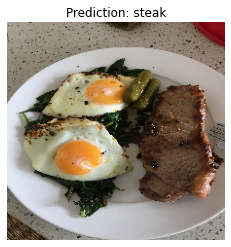

In [94]:
# Test our model on a custome image
pred_and_plot(model_7,"03-steak.jpeg")

Our model works!  Let's try it on another image.. this time pizza

--2021-09-19 04:57:54--  https://raw.githubusercontent.com/vortexash/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2874848 (2.7M) [image/jpeg]
Saving to: ‘03-pizza-dad.jpeg’

03-pizza-dad.jpeg   100%[===================>]   2.74M  --.-KB/s    in 0.07s   

2021-09-19 04:57:54 (42.1 MB/s) - ‘03-pizza-dad.jpeg’ saved [2874848/2874848]



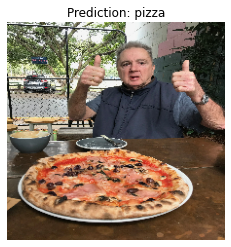

In [95]:
# Download another test custom image and make a prediction on it
!wget https://raw.githubusercontent.com/vortexash/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg
pred_and_plot(model_7, "03-pizza-dad.jpeg")